## Лабораторная работа №6 по курсу "Нейроинформатика" на тему "Сети Кохонена"

*Целью работы* является исследование свойств слоя Кохонена, карты Кохонена, а также применение сетей в задачах кластеризации и классификации.

**Задание:**  Использовать слой Кохонена для выполнения кластеризации множества точек. Проверить качество разбиения.

### Вариант 10
Выполнил студент Шавандрин Фёдор  
Группа М8О-408Б-19

In [1]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Обучающее множество согласно варианту.

In [2]:
points = [
        [0, 0.7],
        [0.3, -1.3],
        [1.3, 0.8],
        [1.2, 0.1],
        [1.2, 0.9],
        [0.5, -0.7],
        [0.7, -1.5],
        [1.4, 0.5],
        [0.3, 0],
        [0.6, 0.6],
        [0.8, -0.7],
        [0.5, 0.1]
]

### Реализация карты Кохонена для кластеризации точек

In [3]:
class kohonen_map():
    def __init__(self, input_features, w, h):
        # инициализация размера карты и входных фичей
        self.input_features = input_features
        self.w = w
        self.h = h
        self.nodes = np.random.randn(w * h, input_features)
        self.indexes = np.array([[x, y] for x in range(0, h) for y in range(0, w)])
    
    # функция для обновления узлов
    def update(self, input, r, lr):
        dists_to_input = np.linalg.norm(self.nodes - input, axis=1)
        best_match_id = np.argmin(dists_to_input)

        rest_dists_to_bmu = np.linalg.norm(self.indexes - self.indexes[best_match_id], axis=1)

        # обновляем узлы, расстояние до которых меньше заданного радиуса
        for node, distance in zip(self.nodes, rest_dists_to_bmu):
            if distance < r:
                influence = np.exp(-distance / (2 * r))
                node += lr * influence * (input - node)
                
    # функция обучения карты Кохонена
    def train(self, data, epochs, start_lr=1):
        init_r = max(self.w, self.h) // 2
        radius_decrease_koeff = epochs / np.log(init_r) # коэффициент снижения радиуса после каждой эпохи
        for epoch in tqdm(range(epochs)):
            np.random.shuffle(data)
            r = init_r * np.exp(-epoch / radius_decrease_koeff)
            lr = start_lr * np.exp(-epoch / epochs)
            for elem in data:
                self.update(elem, r, lr)

### Обучение карты Кохонена

Размер карты - 50x50

In [4]:
model = kohonen_map(input_features=2, w=50, h=50)

Посмотрим, как выглядят точки до кластеризации

In [10]:
# нормируем узлы, чтобы матплотлиб успешно отработал
nodes = model.nodes
nodes_min = np.min(nodes, axis=0)
nodes_max = np.max(nodes, axis=0)
nodes_scaled = ((nodes - nodes_min) / (nodes_max - nodes_min)).reshape((model.h, model.w, model.input_features))

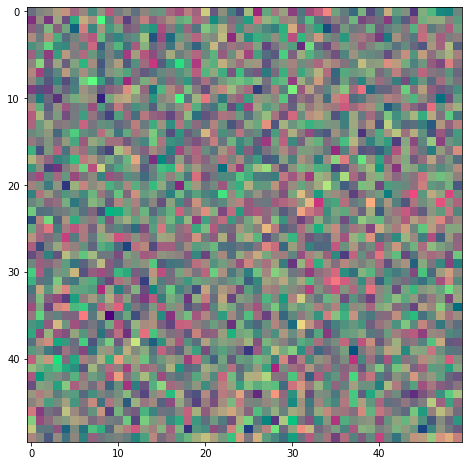

In [6]:
plt.figure(figsize=(15, 8))
plt.imshow(np.insert(nodes_scaled, 2, 0.5, axis = 2))
plt.show()

In [7]:
model.train(data=points, epochs=150, start_lr=1)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:08<00:00, 18.18it/s]


И после кластеризации

In [8]:
nodes = model.nodes
nodes_min = np.min(nodes, axis=0)
nodes_max = np.max(nodes, axis=0)
nodes_scaled = ((nodes - nodes_min) / (nodes_max - nodes_min)).reshape((model.h, model.w, model.input_features))

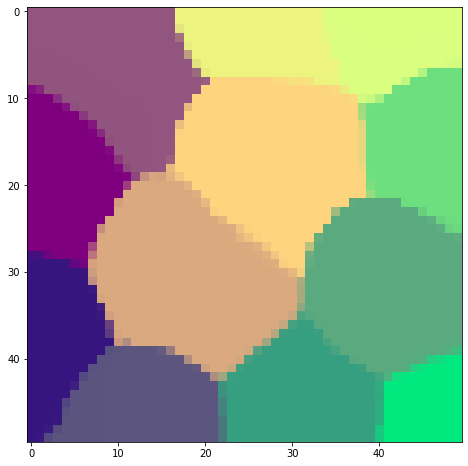

In [9]:
plt.figure(figsize=(15, 8))
plt.imshow(np.insert(nodes_scaled, 2, 0.5, axis = 2))
plt.show()

Видим, что карта Кохонена достаточно успешно решила задачу кластеризации.

### Выводы

В ходе данной лабораторной работы изучил и реализовал самоорганизующуюся карту Кохонена для решения задачи кластеризации точек согласно варианту. Результат кластеризации получился достаточно хороший, можно четко наблюдать границы кластеров.